<a href="https://colab.research.google.com/github/YogithL/Data-Science/blob/main/Yogith_L_Unit6ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/pydata/xarray.git
import xarray as xr
!pip install bambi
import bambi as bmb
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-g1entcka
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-g1entcka
  Resolved https://github.com/pydata/xarray.git to commit 2c8b6e6942e537b24cc09adc5204d6100d2843aa
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

**Task1**:

**Does elpd_loo mean anything if we only have one model?**


No elpd_loo is only useful for comparisons.

**Task2**:

**Describe overfitting, in the context of this course**

Overfitting is when the model is distracted by unnecessary information.

**Task3**:

**How do we mitigate overfitting?**

Utilizing weakly informative, regularizing priors and simpler models will mitigate overfitting.  

**Task4**:

**How do we mitigate underfitting?**

Selecting a model based on elpd_loo ensures we're trying to be accurate and therefore mitigate underfitting.

**Task5:**

**Why would we want more than one predictor in a model?**

A model with multiple predictors is more powerful since it can account for additional factors and leaves less up to guesswork.

**Task6**:

**Can we have too many predictors? How would we now?**

Yes, we can definitely have too many predictors. Since Kulprit automatically compares many variable combinations, we could check if their are models with higher predictors and relatively lower elpd_loos. If thats the case, that model has too many predictors.

**Task7**:

**What is variable selection, and how does it work?**

Variable selection is the process of determining how many predictors and which predictors are neccessary in our model. One approach in variable selection is to run multiple models with different combinations of predictors and compare their elpd_loos.

**Task8**:

**Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:**

**- adding the variables in the model, as is standard.**

**- using that categorical variable as a hierarchy upon the other predictor variable.**

**- adding the variables, plus the categorical variable's interaction with the other variable.**

**Standard Model**

In the standard linear regression approach, the categorical variable is treated as a predictor; it assumes a single, shared slope across all levels of the categorical variable for the predictor.

**Hierarchical Model**

When treating the categorical variable as hierarchical, the slope of the predictor is allowed to vary across the categories. Essentially, the patterns are similar to the Standard approach, but introduces a degree of flexibilty.

**Interaction Model**

The interaction model offers a greater degree of flexibilty, allowing both the slope and **intercept** of the predictor to vary across the categories. Through the HDI, this approach also provides more accurate results in most cases.


**Task9**:

**How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?**

Yes we can, we can use bmb.interpret.plot_predictions to visualize multiple models.

**Task10**:

**Compare the following linear models that all use the basketball data to predict field goal percentage:**

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [ ]:
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv').dropna()

In [ ]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

Sampling chain 1, 0 divergences ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00 / 0:00:04

/usr/local/lib/python3.10/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

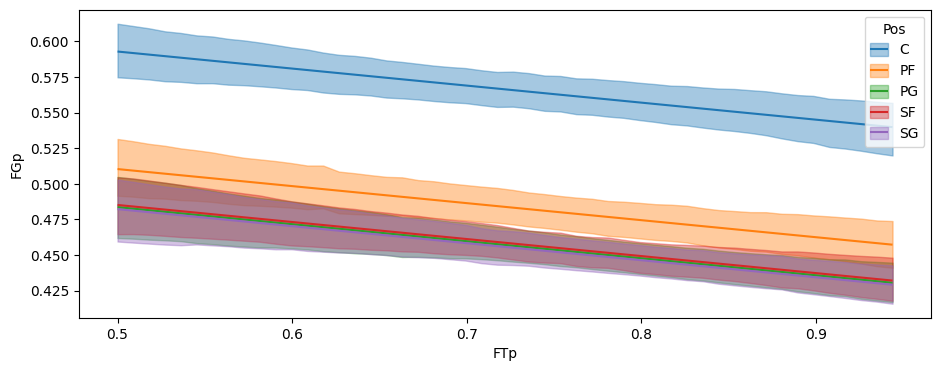

In [ ]:
#Model 1
model_basketball = bmb.Model("`FGp` ~ `FTp` + Pos", data=bb)

idata_basketball = model_basketball.fit(idata_kwargs={'log_likelihood': True})
bmb.interpret.plot_predictions(model_basketball,
                               idata_basketball,
                                ["FTp",  "Pos"], fig_kwargs={"figsize":(11, 4)})

Sampling chain 1, 13 divergences ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00 / 0:01:09

ERROR:pymc.stats.convergence:There were 24 divergences after tuning. Increase `target_accept` or reparameterize.
/usr/local/lib/python3.10/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

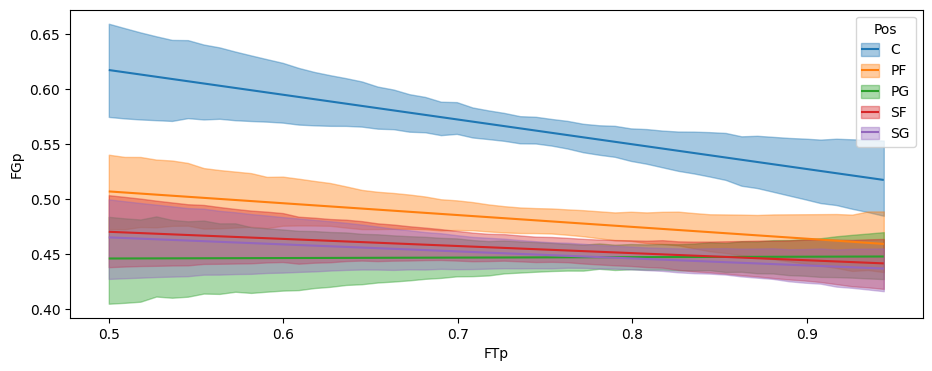

In [ ]:
#Model 2
model_basketball_h = bmb.Model("`FGp` ~ (`FTp`|Pos)", data=bb)

idata_basketball_h = model_basketball_h.fit(idata_kwargs={'log_likelihood': True})
bmb.interpret.plot_predictions(model_basketball_h,
                               idata_basketball_h,
                               ["FTp","Pos"],
                               fig_kwargs={"figsize":(11, 4)})


Sampling chain 1, 0 divergences ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00 / 0:00:40

/usr/local/lib/python3.10/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

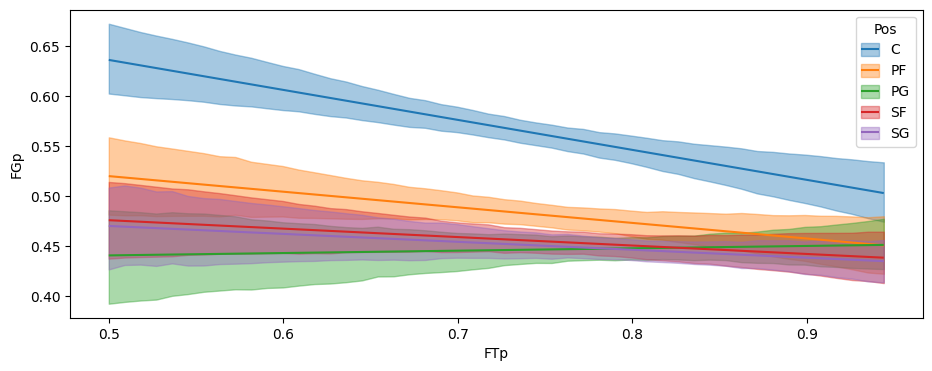

In [ ]:
#Model 3
model_bb_inter = bmb.Model("`FGp` ~ `FTp` + Pos + `FTp`:Pos", data=bb)

idata_bb_inter = model_bb_inter.fit(idata_kwargs={'log_likelihood': True})
bmb.interpret.plot_predictions(model_bb_inter,
                               idata_bb_inter,
                               ["FTp","Pos"],
                               fig_kwargs={"figsize":(11, 4)})

Output()

Output()

/usr/local/lib/python3.10/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

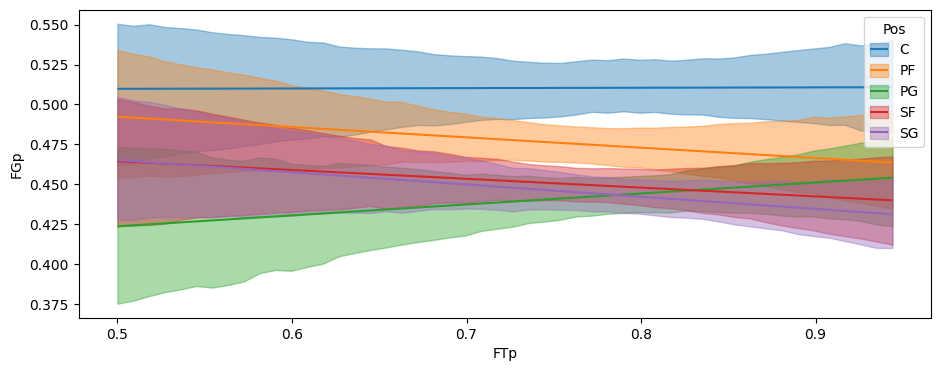

In [ ]:
#Model 4
model_bb_3pos_3inter = bmb.Model("`FGp` ~ 'FTp' + '3PA' + Pos + 'FTp':Pos + `3PA`:Pos + '3PA':'FTp'" , data=bb)
idata_bb_3pos_3inter = model_bb_3pos_3inter.fit(idata_kwargs={'log_likelihood': True})
bmb.interpret.plot_predictions(model_bb_3pos_3inter,
                               idata_bb_3pos_3inter,
                               ["FTp","Pos"],
                               fig_kwargs={"figsize":(11, 4)})

Output()

Output()

/usr/local/lib/python3.10/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

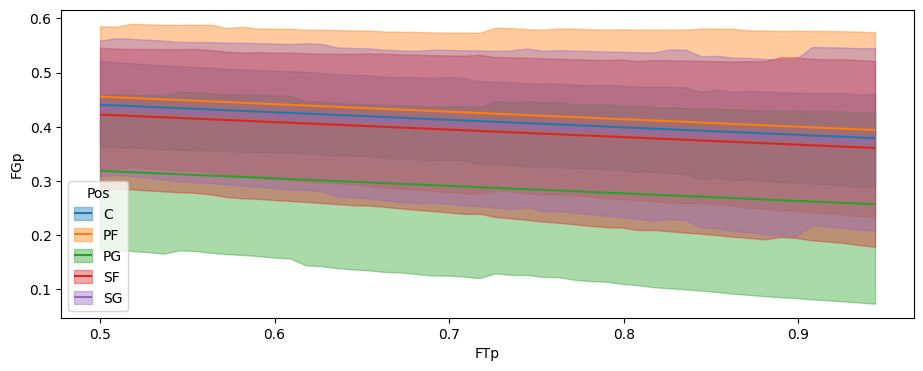

In [ ]:
#Model 5
model_bb_3pos3A_3inter = bmb.Model("`FGp` ~ 'FTp' + '3PA' + Pos + '3PA': Pos", data=bb)
idata_bb_3pos3A_3inter = model_bb_3pos_3inter.fit(idata_kwargs={'log_likelihood': True})
bmb.interpret.plot_predictions(model_bb_3pos3A_3inter,
                               idata_bb_3pos3A_3inter,
                               ["FTp","Pos"],
                               fig_kwargs={"figsize":(11, 4)})

In [ ]:
cmp_df = az.compare( {"model1":idata_basketball,"model2":idata_basketball_h,"model3":idata_bb_inter,"model4":idata_bb_3pos_3inter,"model5":idata_bb_3pos3A_3inter} )
cmp_df

/usr/local/lib/python3.10/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
model4,0,529.248712,18.802814,0.000000,1.000000e+00,14.951497,0.000000,True,log
model5,1,529.079466,19.081526,0.169246,0.000000e+00,14.991169,0.217212,False,log
model3,2,509.446131,13.701285,19.802581,7.252964e-16,16.729105,7.259315,False,log
model2,3,508.356574,13.709848,20.892139,3.032882e-16,16.976907,7.240929,False,log
model1,4,507.629790,8.035529,21.618922,0.000000e+00,16.083100,7.108131,False,log


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

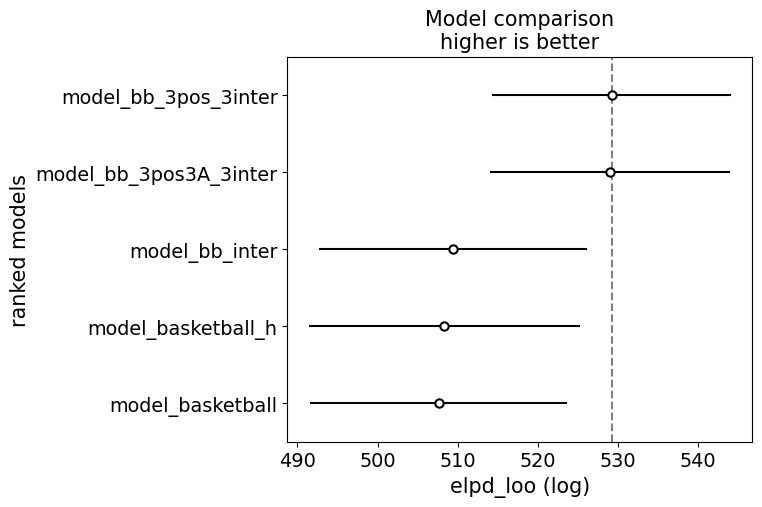

In [ ]:
az.plot_compare(cmp_df)

**Task11**:

**Which model is "better" according to this metric? Why do you think that is?**

Since **model4** is rank 0 and has the greatest elpd_loo (529.2), it is the best. However, **model5's** elpd_loo (529.0) is extremely close so  either model will perform similarly well for predictive purposes. This is well protrayed through the overlapping standard error bars. From a more qualitative perspective, the reliance on interactions between predictors in both model4 and model5 align with the observed accuracy.